In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def dist2d(x_1,y_1,x_2,y_2):
    d=np.sqrt((x_2 - x_1)**2 + (y_2-y_1)**2)
    return d

def distancias2d(datos,n,Histo,tbin):
    for i in range(0,n):
        for j in range(i+1,n):
            distancia=dist2d(datos[0][i],datos[1][i], datos[0][j],datos[1][j])
            indice=int(distancia/tbin) 
            Histo[indice]=Histo[indice]+1
    return Histo

## Creación de datos con redshift

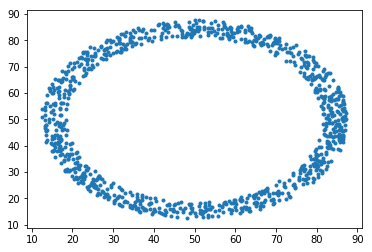

In [3]:
L=150 #tamaño caja
vecind=L/10. #vecindad a analizar
vel=0.8


nbins=50 #numero de bins
dmax = np.sqrt(2*L**2) #Distancia maxima de las divisiones
dmin = 0.0 #distancia mínima
tbin = (dmax-dmin)/nbins

nd=1000 #Numero de datos

nd_d=nd*(nd-1)/2 #distancias datos
ri=5. #radio interior
re=6. #radio exterior

c_x=50.0 #centrado x
c_y=50.0 #centrado y

#crear disco
r_ani=2*np.pi*np.random.uniform(ri,re,nd)#*L  #puntos sobre radio anillo
phi= 2 * np.pi * np.random.rand(nd) #angulo polares
x= r_ani*np.cos(phi)+c_x #coordenada x
y=r_ani*np.sin(phi)+c_y #coordenada y

datos_anillo=(x,y)

plt.plot(datos_anillo[0][:],datos_anillo[1][:],'.')

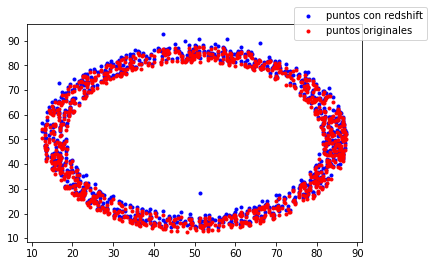

In [4]:
y_red=np.zeros(nd)

datos_redshift=(datos_anillo[0][:],np.zeros(nd))

for i in range(nd):
    d_min=np.infty
    for j in range(i+1,nd):
        d_prueb= dist2d(datos_anillo[0][i],datos_anillo[1][i],datos_anillo[0][j],datos_anillo[1][j])
        if (d_prueb<L/10 and d_min>d_prueb):
            d_min=d_prueb           
    datos_redshift[1][i]=datos_anillo[1][i]+d_min*vel
    
    
plt.plot(datos_redshift[0][:],datos_redshift[1][:],'.',color='b',label='puntos con redshift')
plt.plot(datos_anillo[0][:],datos_anillo[1][:],'.',color='r',label='puntos originales')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})

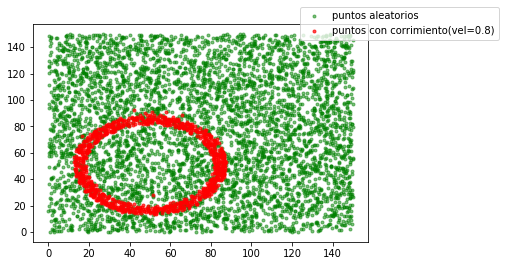

In [5]:
# Creación de random

#definir arreglo de aleatorios
nr=5*nd
x_r = L*np.random.uniform(0,1.,nr)
y_r= L*np.random.uniform(0,1.,nr)

random=(x_r,y_r)
plt.plot(random[0][:],random[1][:],'.',label='puntos aleatorios',c='g',alpha=0.5)
plt.plot(datos_redshift[0][:],datos_redshift[1][:],'.',label='puntos con corrimiento(vel=0.8)',c='r',alpha=0.7)
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})